# Linear Regression
**Sibt ul Hussain**

In [6]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


$$ f(x) = x^4-4x^3+2 $$

In [7]:
f=lambda x: x**4-4*x**3+2

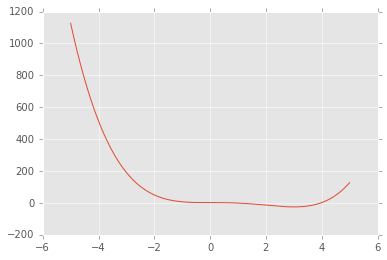

In [8]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [9]:
minimum=+inf
mx=+inf

# Your code here
for xx in x: 
    if f(xx)<minimum:
        minimum=f(xx)
        mx=xx

print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997998


### Gradient Descent

In [10]:
def f_derivative(x):
    # Your code here
    # Calculate the derivative and write your code here
    out = (4*x**3)-(12*x**2)
    return out

In [11]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

# Your code here
while abs(x_old-x_new) > precision: 
    x_old=x_new
    x_new=x_old-(eps*f_derivative(x_old))
print "Local minimum occurs at", x_new

Local minimum occurs at [[ 2.99998539]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [12]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print dfx, cdfx, dfx-cdfx

-13.5000449999 -13.5 -4.49999367316e-05


### Let's generate some random data

In [13]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

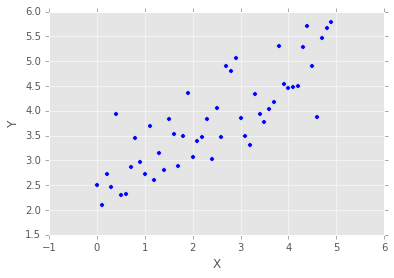

In [14]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [15]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)

In [16]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [17]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [18]:
print ecf

[[ 25416.07545678  25352.93342723  25289.8751353  ...,   2607.09783807
    2624.56479647   2642.11172613]
 [ 25395.0154134   25331.89778375  25268.86390362 ...,   2610.46468023
    2627.95613661   2645.52757256]
 [ 25373.96532168  25310.87252259  25247.86333701 ...,   2613.84154491
    2631.35747998   2648.95342748]
 ..., 
 [  9384.58047626   9345.8652929    9307.23275084 ...,  10928.82183783
   10970.71608806  11012.68872848]
 [  9373.49048726   9334.7998159    9296.1917628  ...,  10942.15890777
   10984.07765929  11026.07479952]
 [  9362.41065637   9323.74452936   9285.16100147 ...,  10955.50572249
   10997.44883077  11039.47061926]]


In [19]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print tX.shape, tY.shape

(1000, 1000) (1000, 1000)


In [20]:
print ecf.shape

(1000, 1000)


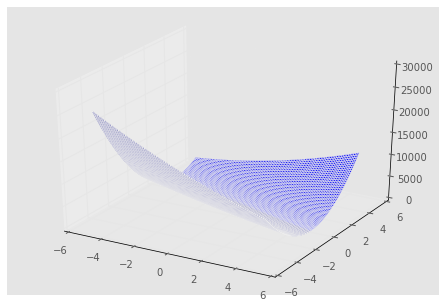

In [21]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [22]:
def hyp(theta, X):
    # Your code here
    return X.dot(theta)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [23]:
def cost_function(theta,X,Y):
    # Your code here
    preds=hyp(theta, X)
    sums=np.sum((preds-Y)**2)
    return sums/float(2*X.shape[0])

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [24]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    # Your code here
    preds=hyp(theta, X)-Y
    out=preds.dot(X)/float(nexamples)
    return out 

In [25]:
print X.shape
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print nx.shape

(50,)
(50, 2)


In [26]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print thetas

[ 0.5881308   0.89771373]


In [27]:
cf=cost_function(thetas,nx,Y)
print cf

1.23403506714


In [28]:
ad=derivative_cost_function(thetas,nx,Y)
print ad

[-3.55189882 -1.47610053]


In [29]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    eps=0.00001
    alpha=0.01
    cf=[]
    numiter=0
    
    # Your code here
    cf.append(cost_function(thetas,X,Y))
    while (numiter<maxniter):
        thetas=thetas-(alpha*derivative_cost_function(thetas,X,Y))
        cf.append(cost_function(thetas,X,Y))
        #print cf[-1],
        #print cf[-2]
        if abs(cf[-1]-cf[-2])<=eps:
            break
        numiter=numiter+1
    plt.plot(cf)
    return thetas

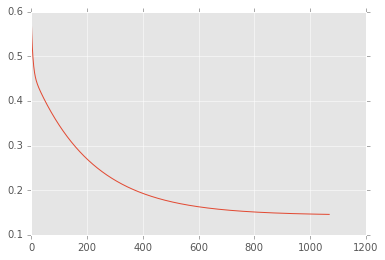

In [30]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function)

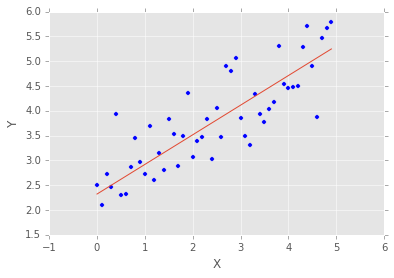

In [31]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))